In [66]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
from mpl_toolkits import mplot3d
%pip install mplcursors
import mplcursors
%matplotlib inline

# Dataset is an extract from www.waterqualitydata.us, for MD, Montgomery County
# for biological, inorganic and toxic particles, from 1/1/21 through 12/1/23

#import the csv data file
dataset = pd.read_csv('WaterQualityMoco.csv')


#display the first 5 rows of the dataset
dataset.head()

Note: you may need to restart the kernel to use updated packages.


,ActivityStartDate,HydrologicEvent,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,DetectionQuantitationLimitMeasure/MeasureValue,ResultAnalyticalMethod/MethodName,ResultAnalyticalMethod/MethodDescriptionText,LaboratoryName,...,SampleCollectionMethod/MethodName,SampleCollectionMethod/MethodDescriptionText,SampleCollectionEquipmentName,ResultIdentifier,MeasureQualifierCode,ResultStatusIdentifier,ResultValueTypeName,USGSPCode,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext
0,4/6/2021,Routine sample,NaN,Escherichia coli,NaN,81.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,"10 or more equal width verticals, equal non-is...",NaN,US DH-81,NWIS-120863344,NaN,Accepted,Actual,50468.0,BAC15,USGS
1,4/6/2021,Routine sample,NaN,Total Coliform,Total,2000.0,NaN,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,"10 or more equal width verticals, equal non-is...",NaN,US DH-81,NWIS-120863345,NaN,Accepted,Actual,50569.0,BAC48,USGS
2,3/28/2021,Storm,NaN,Escherichia coli,NaN,86.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,Point sample,NaN,"Sampler, point, automatic",NWIS-120811125,NaN,Accepted,Actual,50468.0,BAC15,USGS
3,3/28/2021,Storm,NaN,Total Coliform,Total,2900.0,NaN,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey,...,Point sample,NaN,"Sampler, point, automatic",NWIS-120811126,NaN,Accepted,Actual,50569.0,BAC48,USGS
4,10/25/2021,Storm,NaN,Escherichia coli,NaN,82000.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,Point sample,NaN,"Sampler, point, automatic",NWIS-122669339,NaN,Accepted,Actual,50468.0,BAC15,USGS


In [67]:
# Extract unique HydrologicEvents
unique_events = dataset['HydrologicEvent'].unique()

# Extract unique particles in the 'characteristname' variable
unique_particles = dataset['CharacteristicName'].unique()


# Print the unique events and particles
print("Unique Events:", unique_events)
print("Unique Particles:", unique_particles)

Unique Events: ['Routine sample' 'Storm' 'Snowmelt' nan]
Unique Particles: ['Escherichia coli' 'Total Coliform' 'Calcium' 'Magnesium' 'Sodium'
 'Sodium, percent total cations' 'Potassium' 'Uranium' 'Benfluralin'
 'Coumaphos' 'Dithiopyr' 'Fenpyroximate' 'Flufenacet' 'Flumetralin'
 'Flutolanil' 'Oxadiazon' 'Prodiamine' 'Paclobutrazol' 'Quinoxyfen'
 'Fenamidone' 'Acibenzolar-S-methyl' 'Picoxystrobin' 'Fluxapyroxad'
 'Fluopicolide' 'Cyazofamid' 'Mandipropamid' 'Ethaboxam'
 'Chlorantraniliprole' 'Imidacloprid desnitro' 'Flonicamid'
 'Imidacloprid-urea' 'Cymoxanil' 'Cyantraniliprole' 'Penoxsulam'
 'Fluridone' 'Desthio-prothioconazole' 'Tolfenpyrad' 'Fluopyram'
 'Sedaxane' 'Benzovindiflupyr'
 "N-(2-chloro-5-thiazolyl methyl)-N'-nitroguanidine" 'Ipconazole'
 'Flupyradifurone' 'Oxathiapiprolin' 'Tricyclazole' 'Penthiopyrad'
 'Imidacloprid-olefin' '1-(Aminomethyl)cyclohexaneacetic acid'
 'Chlorfenapyr' 'Thiamethoxam degradate CGA-355190' 'Isofetamid'
 'Indaziflam' '5-Hydroxyimidacloprid' 'Tebuco

In [68]:
# Create a new DataFrame to count occurrences of each particle in each hydrologic event
particle_counts = pd.DataFrame(index=unique_particles, columns=dataset['HydrologicEvent'].unique())

# Populate the bacteria_counts DataFrame with counts
for particles in unique_particles:
    for event in dataset['HydrologicEvent'].unique():
        count = dataset[(dataset['CharacteristicName'] == particles) & (dataset['HydrologicEvent'] == event)].shape[0]
        particle_counts.at[particles, event] = count

# Print the bacteria_counts DataFrame
print("Particle Counts:")
print(particle_counts)


Particle Counts:
                 Routine sample Storm Snowmelt NaN
Escherichia coli             41   111        1   0
Total Coliform               41   111        1   0
Calcium                       3     0        0   0
Magnesium                     3     0        0   0
Sodium                        3     0        0   0
...                         ...   ...      ...  ..
GFD DNA marker                0     0        0   0
BacR DNA marker               0     0        0   0
DG3 DNA marker                0     0        0   0
HF183 DNA marker              0     0        0   0
Enterococcus                  0     0        0   0

[191 rows x 4 columns]


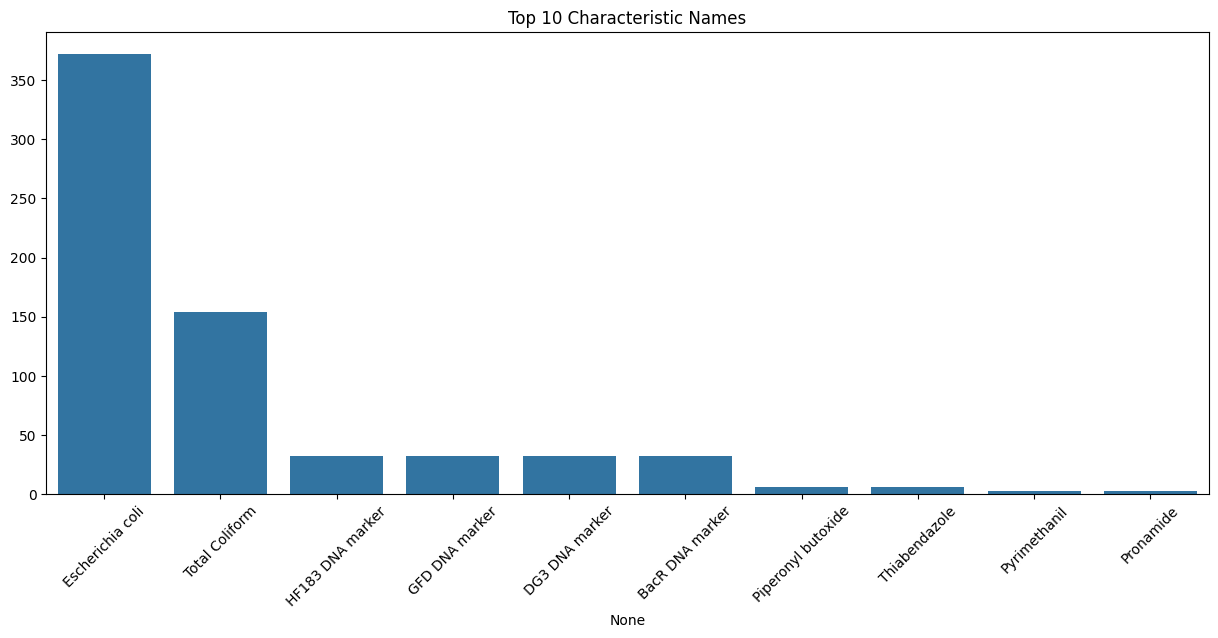

In [69]:
top_n = 10  # Change N to your desired value
plt.figure(figsize=(15, 6))
sns.barplot(x=dataset['CharacteristicName'].value_counts().nlargest(top_n).index, y=dataset['CharacteristicName'].value_counts().nlargest(top_n).values)
plt.xticks(rotation=45)
plt.title(f'Top {top_n} Characteristic Names')
plt.show()

In [70]:
# create a new variable called outcome to help determine if water is safe (outcome=0) or unsafe (outcome=1)

for index, row in dataset.iterrows():
    dataset.loc[index,'outcome'] = 0
    if row['CharacteristicName'] == 'Escherichia coli' :
        dataset.loc[index,'outcome'] = 1
        dataset.loc[index,'DetectionQuantitationLimitMeasure/MeasureValue'] = 240000
    if row['CharacteristicName'] == 'Uranium':
        dataset.loc[index,'outcome'] = 1
    if (row['ResultAnalyticalMethod/MethodDescriptionText'] == 'Pesticides, water, SPE GC&LC/TMS') & (row['ResultDetectionConditionText'] != "Not Detected") :
        dataset.loc[index,'outcome'] = 1
    if (row['ResultAnalyticalMethod/MethodDescriptionText'] == 'Pharma, wf, LC/MS/MS (Sch 2440)') & (row['ResultDetectionConditionText'] != 'Not Detected') :
        dataset.loc[index,'outcome'] = 1
    if np.isnan(row['ResultMeasureValue']) :
        dataset.loc[index,'ResultMeasureValue'] = 0.0
    if np.isnan(row['DetectionQuantitationLimitMeasure/MeasureValue']) :
        dataset.loc[index,'DetectionQuantitationLimitMeasure/MeasureValue'] = 0.0
    if dataset.loc[index,'DetectionQuantitationLimitMeasure/MeasureValue'] > 0 :
        dataset.loc[index,'Rate'] = dataset.loc[index,'ResultMeasureValue'] / dataset.loc[index,'DetectionQuantitationLimitMeasure/MeasureValue']
    else :
        dataset.loc[index,'Rate'] = 0
dataset.head()


,ActivityStartDate,HydrologicEvent,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,DetectionQuantitationLimitMeasure/MeasureValue,ResultAnalyticalMethod/MethodName,ResultAnalyticalMethod/MethodDescriptionText,LaboratoryName,...,SampleCollectionEquipmentName,ResultIdentifier,MeasureQualifierCode,ResultStatusIdentifier,ResultValueTypeName,USGSPCode,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext,outcome,Rate
0,4/6/2021,Routine sample,NaN,Escherichia coli,NaN,81.0,0.0,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,US DH-81,NWIS-120863344,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
1,4/6/2021,Routine sample,NaN,Total Coliform,Total,2000.0,0.0,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,US DH-81,NWIS-120863345,NaN,Accepted,Actual,50569.0,BAC48,USGS,0.0,0.0
2,3/28/2021,Storm,NaN,Escherichia coli,NaN,86.0,0.0,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-120811125,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
3,3/28/2021,Storm,NaN,Total Coliform,Total,2900.0,0.0,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-120811126,NaN,Accepted,Actual,50569.0,BAC48,USGS,0.0,0.0
4,10/25/2021,Storm,NaN,Escherichia coli,NaN,82000.0,0.0,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-122669339,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0


In [71]:
#DKedit#
dataset.loc[:, ['CharacteristicName', 'ResultMeasureValue', 'ResultDetectionConditionText']]

,CharacteristicName,ResultMeasureValue,ResultDetectionConditionText
0,Escherichia coli,81.0,NaN
1,Total Coliform,2000.0,NaN
2,Escherichia coli,86.0,NaN
3,Total Coliform,2900.0,NaN
4,Escherichia coli,82000.0,NaN
...,...,...,...
1210,Escherichia coli,980.0,NaN
1211,Escherichia coli,2430.0,NaN
1212,Escherichia coli,461.0,NaN
1213,Escherichia coli,1733.0,NaN


In [72]:
#DKedit#
dataset.loc[:, 'ResultDetectionConditionText'].unique()

array([nan, 'Present Above Quantification Limit', 'Not Detected',
       'Not Reported'], dtype=object)

In [73]:
#DKedit#
LE = preprocessing.LabelEncoder()
dataset['result_identifier'] = LE.fit_transform(dataset['ResultDetectionConditionText'])
dataset.loc[:, ['result_identifier', 'ResultDetectionConditionText']]

,result_identifier,ResultDetectionConditionText
0,3,NaN
1,3,NaN
2,3,NaN
3,3,NaN
4,3,NaN
...,...,...
1210,3,NaN
1211,3,NaN
1212,3,NaN
1213,3,NaN


In [74]:
dataset['result_identifier'].unique()

array([3, 2, 0, 1])

In [75]:
#DKedit#
dataset.loc[:, 'CharacteristicName'].unique()

array(['Escherichia coli', 'Total Coliform', 'Calcium', 'Magnesium',
       'Sodium', 'Sodium, percent total cations', 'Potassium', 'Uranium',
       'Benfluralin', 'Coumaphos', 'Dithiopyr', 'Fenpyroximate',
       'Flufenacet', 'Flumetralin', 'Flutolanil', 'Oxadiazon',
       'Prodiamine', 'Paclobutrazol', 'Quinoxyfen', 'Fenamidone',
       'Acibenzolar-S-methyl', 'Picoxystrobin', 'Fluxapyroxad',
       'Fluopicolide', 'Cyazofamid', 'Mandipropamid', 'Ethaboxam',
       'Chlorantraniliprole', 'Imidacloprid desnitro', 'Flonicamid',
       'Imidacloprid-urea', 'Cymoxanil', 'Cyantraniliprole', 'Penoxsulam',
       'Fluridone', 'Desthio-prothioconazole', 'Tolfenpyrad', 'Fluopyram',
       'Sedaxane', 'Benzovindiflupyr',
       "N-(2-chloro-5-thiazolyl methyl)-N'-nitroguanidine", 'Ipconazole',
       'Flupyradifurone', 'Oxathiapiprolin', 'Tricyclazole',
       'Penthiopyrad', 'Imidacloprid-olefin',
       '1-(Aminomethyl)cyclohexaneacetic acid', 'Chlorfenapyr',
       'Thiamethoxam degradat

In [76]:
#DKedit#
dataset['chemical_identifier'] = LE.fit_transform(dataset['CharacteristicName'])
dataset.loc[:, ['CharacteristicName', 'chemical_identifier']]

,CharacteristicName,chemical_identifier
0,Escherichia coli,62
1,Total Coliform,174
2,Escherichia coli,62
3,Total Coliform,174
4,Escherichia coli,62
...,...,...
1210,Escherichia coli,62
1211,Escherichia coli,62
1212,Escherichia coli,62
1213,Escherichia coli,62


In [77]:
# Determine Features and Target (outcome)
# X = dataset.iloc[:,5:7]  using ResultMeasureValue and DetectionQuant
X = dataset.loc[:, ['chemical_identifier', 'ResultMeasureValue', 'result_identifier']]
#X = X.reshape(-1,1)
y = dataset.outcome
X.head()

,chemical_identifier,ResultMeasureValue,result_identifier
0,62,81.0,3
1,174,2000.0,3
2,62,86.0,3
3,174,2900.0,3
4,62,82000.0,3


In [78]:
# Split the data into train and test, 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Instantiate, preprocess, train, and predict (test)
LogReg = LogisticRegression()


In [79]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )


Classes [0. 1.]
Intercept [-2.42921517]
Coefficients [[-1.25675035 -0.08230585  2.7381646 ]]


In [80]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.8947368421052632
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92       207
         1.0       0.76      0.99      0.86        97

    accuracy                           0.89       304
   macro avg       0.88      0.92      0.89       304
weighted avg       0.92      0.89      0.90       304



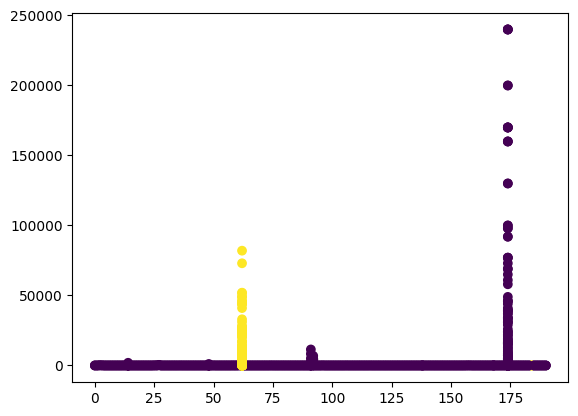

In [96]:
x = X['chemical_identifier']
w = X['ResultMeasureValue']
plt.scatter(X['chemical_identifier'], X['ResultMeasureValue'], c = y)

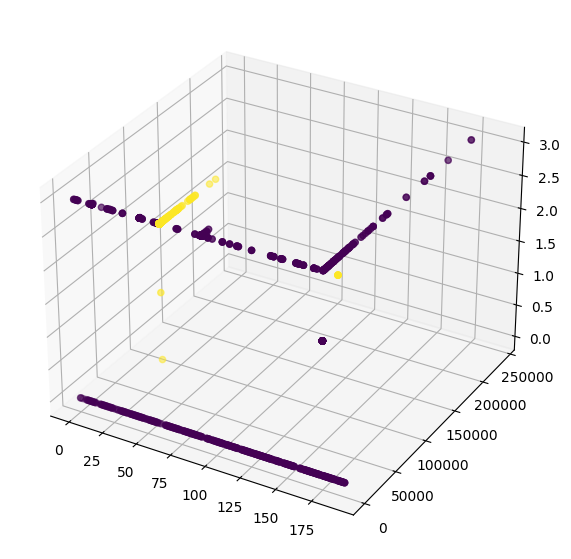

In [94]:
##DKEdit
z = X['result_identifier']
x = X['chemical_identifier']
w = X['ResultMeasureValue']

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, w, z, c = y)
mplcursors.cursor(hover=True)
plt.show()

In [82]:
# Predict probabilities
y_pred_probs = LogReg.predict_proba(X_test)[:,1]

print(y_pred_probs[:10])


[6.42858808e-01 8.27683912e-02 6.42046112e-01 1.10650499e-01
 7.98167081e-01 1.85490614e-02 6.42637514e-01 2.66181624e-03
 7.71546629e-04 1.77611185e-03]


In [83]:
#Determine Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[176,  31],
       [  1,  96]])

Text(0.5, 427.9555555555555, 'Predicted label')

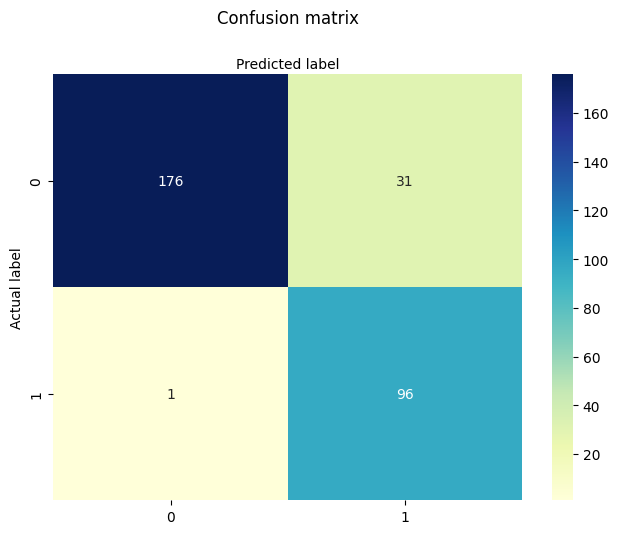

In [84]:
categories = [0,1]
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

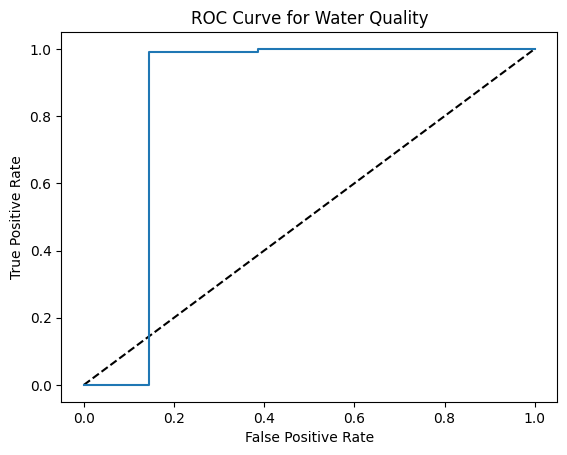

In [85]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Water Quality')
plt.show()

**Shadeja**

With this dataset, we can explore the bacteria that impacts the water quality in Montgonery County. The column 'CharachteristicName' contains 191 unique bacteria with Escherichia coli (E. coli) having the top count of 372 and Total Coliform is second highest at 154.  E. coli are a diverse group of bacteria that can be found in the intestines of people and animals. Some strains of E. coli can cause illness such as diarrhea, urinary tract infections, and pneumonia. Total coliforms decribes bacterias found in the soil and in water that has been in contact with surface water, or animal and human waste. Positive total coliforms in the water can help indicate the presence of pathogens that may cause disease.

In [86]:
## Explore 'CharachteristicName'.
dataset['CharacteristicName'].describe()

count                 1215
unique                 191
top       Escherichia coli
freq                   372
Name: CharacteristicName, dtype: object

In [87]:
## Display the counts of unique values in 'CharachteristicName'.

characteristic_counts = dataset['CharacteristicName'].value_counts()

print("Count of Unique Values in CharacteristicName:")
print(characteristic_counts)

Count of Unique Values in CharacteristicName:
Escherichia coli    372
Total Coliform      154
HF183 DNA marker     32
GFD DNA marker       32
DG3 DNA marker       32
                   ... 
Bifenthrin            3
Carbaryl              3
Carbofuran            3
Chlorothalonil        3
Enterococcus          3
Name: CharacteristicName, Length: 191, dtype: int64


In [88]:
# Convert 'ActivityStartDate' to datetime format
dataset['ActivityStartDate'] = pd.to_datetime(dataset['ActivityStartDate'])

In [89]:
# Filter data for Escherichia coli and Total Coliform
ecoli_data = dataset[dataset['CharacteristicName'] == 'Escherichia coli']
coliform_data = dataset[dataset['CharacteristicName'] == 'Total Coliform']

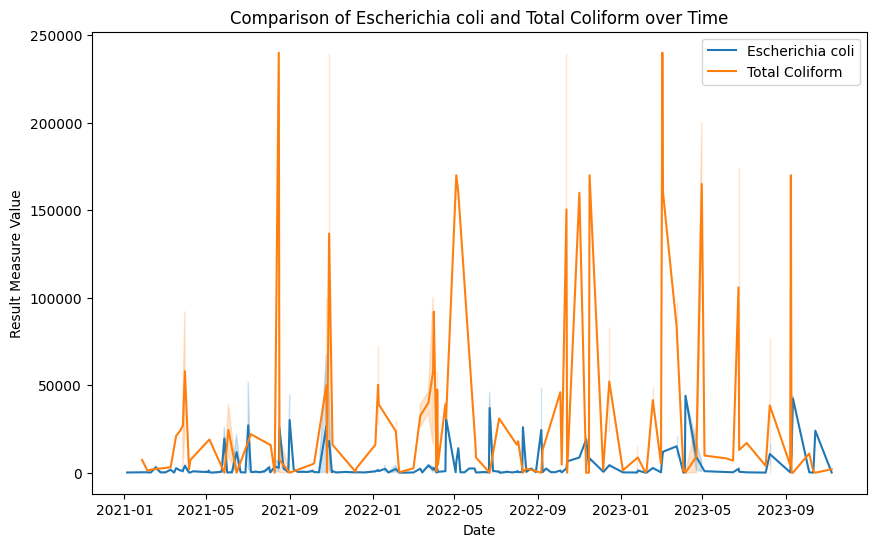

In [90]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='ActivityStartDate', y='ResultMeasureValue', data=ecoli_data, label='Escherichia coli')
sns.lineplot(x='ActivityStartDate', y='ResultMeasureValue', data=coliform_data, label='Total Coliform')
plt.title('Comparison of Escherichia coli and Total Coliform over Time')
plt.xlabel('Date')
plt.ylabel('Result Measure Value')
plt.legend()
plt.show()

We can also explore if the method of collection the measured values of collected samples. The boxplots below display the distribution of E. coli and total coliforms across collection methods.

/tmp/ipykernel_1003/4213836799.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


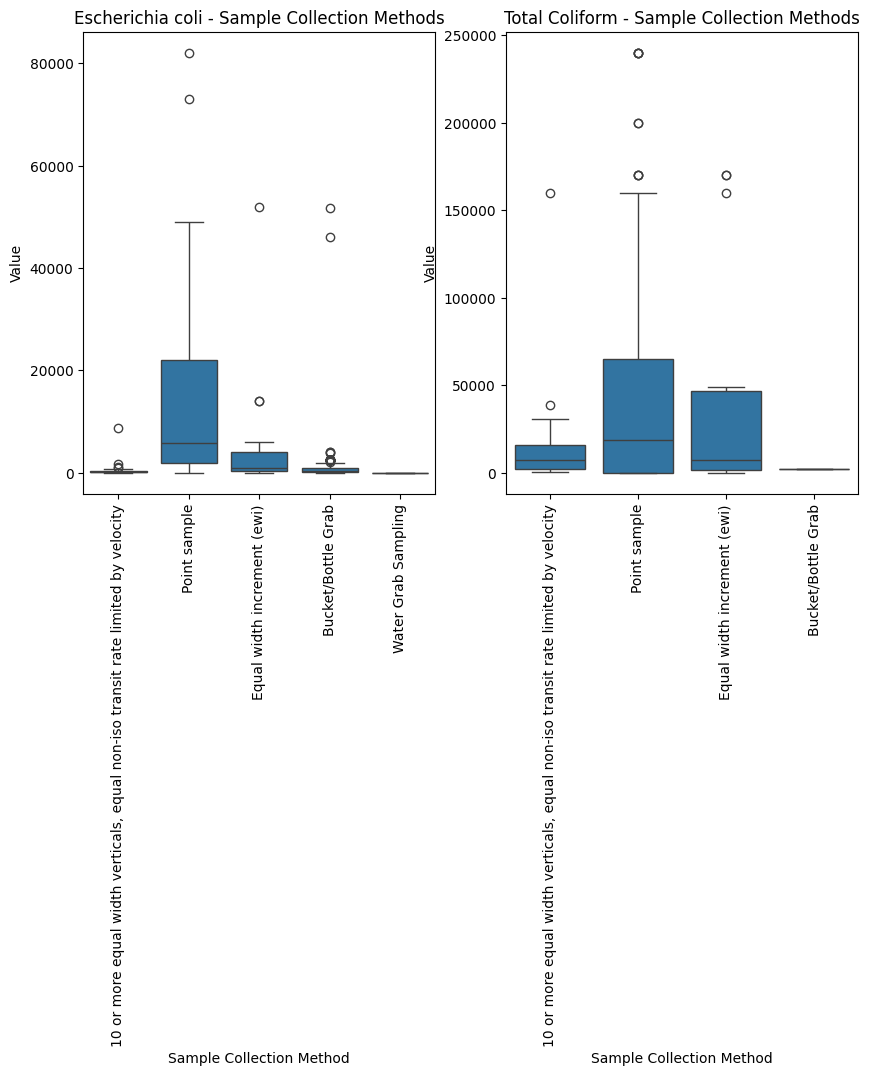

In [91]:
# Create box plots to compare sample collection methods for Escherichia coli.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='SampleCollectionMethod/MethodName', y='ResultMeasureValue', data=ecoli_data)
plt.title('Escherichia coli - Sample Collection Methods')
plt.xlabel('Sample Collection Method')
plt.ylabel('Value')
plt.xticks(rotation=90)

# Create box plots to compare sample collection methods for Total Coliform.
plt.subplot(1, 2, 2)
sns.boxplot(x='SampleCollectionMethod/MethodName', y='ResultMeasureValue', data=coliform_data)
plt.title('Total Coliform - Sample Collection Methods')
plt.xlabel('Sample Collection Method')
plt.ylabel('Value')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

How do hydrologic events impact the levels of E. coli and total coliforms? With the swarmplot below, we can investigate whether a storm will result in higher contamination levels versus routine samples.

In [92]:
# Filter data for Routine and Storm events
routine_data = dataset[dataset['HydrologicEvent'] == 'Routine']
storm_data = dataset[dataset['HydrologicEvent'] == 'Storm']

/home/dataplant/.local/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dataplant/.local/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dataplant/.local/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dataplant/.local/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dataplant/.local/lib/python3.8/site-packages/seaborn/categorical.py

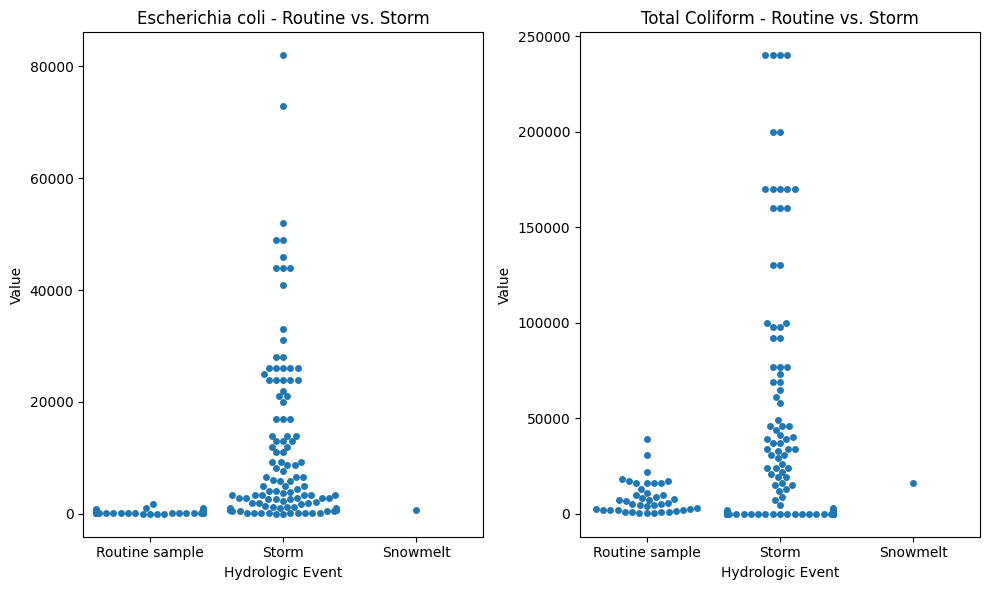

In [93]:
# Create swarm plots to compare Routine and Storm events for Escherichia coli
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.swarmplot(x='HydrologicEvent', y='ResultMeasureValue', data=ecoli_data)
plt.title('Escherichia coli - Routine vs. Storm')
plt.xlabel('Hydrologic Event')
plt.ylabel('Value')

# Create swarm plots to compare Routine and Storm events for Total Coliform
plt.subplot(1, 2, 2)
sns.swarmplot(x='HydrologicEvent', y='ResultMeasureValue', data=coliform_data)
plt.title('Total Coliform - Routine vs. Storm')
plt.xlabel('Hydrologic Event')
plt.ylabel('Value')

plt.tight_layout()
plt.show()